In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [2]:
raw_data = pd.read_csv('airfoil_self_noise.csv')

In [3]:
raw_data

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frquency(Hz)          1503 non-null   int64  
 1   Angle_of_Attack       1503 non-null   float64
 2   Chord_Length          1503 non-null   float64
 3   Free_stream_velocity  1503 non-null   float64
 4   Displacement          1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [6]:
corr, _ = pearsonr(raw_data['Angle_of_Attack'], raw_data['Displacement'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.753


After you see carefully, you'd infer that Angle_of_Attack and Displacement show 75% correlation. It's up to us if we should consider this correlation % as a damaging level. Usually, correlation above 80% (subjective) is considered higher. Therefore, we can forego this combination and won't remove any variable.

In [7]:
y = raw_data['Sound_pressure_level']
x1 = raw_data[['Frquency(Hz)','Angle_of_Attack', 'Chord_Length', 'Free_stream_velocity', 'Displacement' ]]

In [11]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# results will contain the output of the Ordinary Least Squares(OLS) regression
#fit() will apply a specific estimation technique (OLS in this case) to obtain the fit of the model
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Sound_pressure_level   R-squared:                       0.516
Model:                              OLS   Adj. R-squared:                  0.514
Method:                   Least Squares   F-statistic:                     318.8
Date:                  Wed, 01 Jul 2020   Prob (F-statistic):          1.15e-232
Time:                          15:17:20   Log-Likelihood:                -4490.1
No. Observations:                  1503   AIC:                             8992.
Df Residuals:                      1497   BIC:                             9024.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  132.8338      0.545    243.866      0.000     131.765     133.902
Frquency(Hz)            -0.0013   4.21e-05    -30.452      0.000      -0.001      -0.001
Angle_of_Attack         -0.4219      0.039    -10.847      0.000      -0.498      -0.346
Chord_Length           -35.6880      1.630    -21.889      0.000     -38.886     -32.490
Free_stream_velocity     0.0999      0.008     12.279      0.000       0.084       0.116
Displacement          -147.3005     15.015     -9.810      0.000    -176.753    -117.848
==============================================================================
Omnibus:                       12.947   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.228
Skew:                          -0.020   Prob(JB):                     6.68e-05
Kurtosis:                       3.553   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept - This is the βo value. It's the prediction made by model when all the independent variables are set to zero. \

Const - This represents regression coefficients for respective variables. It's the value of slope. Let's interpret it for Chord_Length. We can say, when Chord_Length is increased by 1 unit, holding other variables constant, Sound_pressure_level decreases by a value of -35.69. \ 

Std. Error - This determines the level of variability associated with the estimates. Smaller the standard error of an estimateis, more accurate will be the predictions. \

t value - t statistic is generally used to determine variable significance, i.e. if a variable is significantly adding information to the model. t value > 2 suggests the variable is significant. I used it as an optional value as the same information can be extracted from the p value. \

p value - It's the probability value of respective variables determining their significance in the model. p value < 0.05 is always desirable.

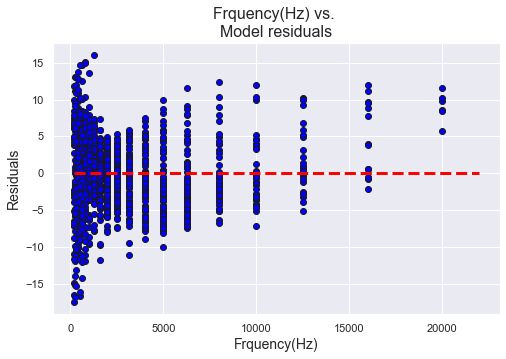

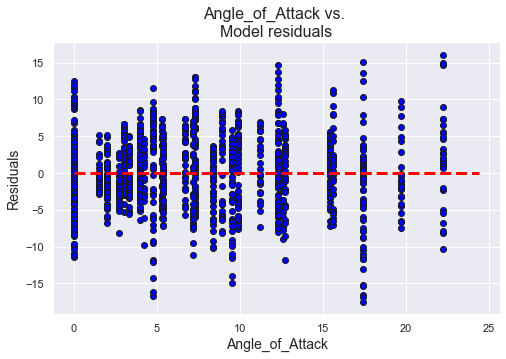

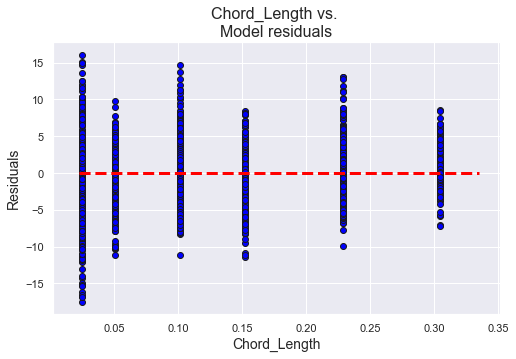

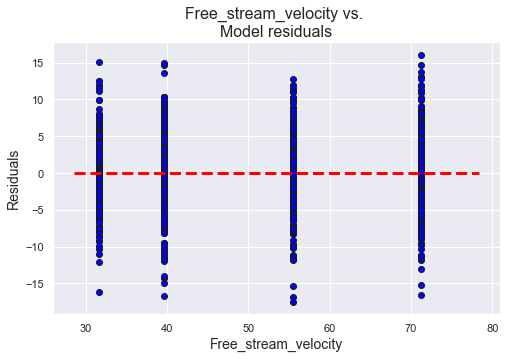

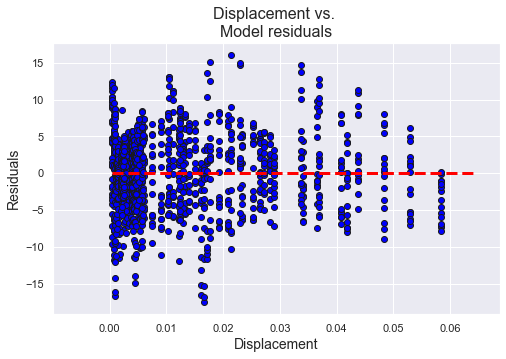

In [16]:
for c in raw_data.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=raw_data[c],y=results.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(raw_data[c])
    xmax = max(raw_data[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()